## 卷积

 #### -图像卷积就是卷积核(卷积核有很多个)在图像上按行滑动遍历像素(每次移动一个步长)时不断的相乘求和过程
<font size=3> -步长: 步长就是卷积核在图像上移动的长度  (卷积的步长一般都是一) 
-padding: 卷积之后图片的长宽会变小，如果要保持图像的大小不变，就需要在图片周围填充0，padding指的就是填充0的圈数
  可以通过公式计算出需要填充0的圈数<br>
   -四个超参数:Filter数量K(卷积核的数量) Filter大小F(一般都是奇数)步长S 零填充大小P   <br>
    &nbsp;&nbsp;输出体积大小 H2*W2*D2 <br>
   &nbsp;&nbsp;H2 = (H1 - F + 2p) / S +1<br>
   &nbsp;&nbsp;W2 = (W1 - F + 2P) / s +1<br>
   &nbsp;&nbsp;D2 = K<br>
如果想要卷积之后图片大小不变，可以得出:(N+2P-F+1) = N  &nbsp;&nbsp;&nbsp;--->&nbsp;&nbsp;P = (F-1)/2<br></font>

### 图片卷积中，卷积核一般为奇数的原因：

### (1).根据padding的公式，如果要保持图片的大小不变，采用偶数卷积核的话，将会出现填充1.5圈的情况<br>(2).奇数维度的过滤器由中心，便于指出过滤器的位置，即opencv卷积中的锚点

## 卷积案例:

In [14]:
import cv2
import numpy as np
img = cv2.imread('./1.aidaishu.jpg')
img = cv2.resize(img,(378,504))

### 卷积操作<br><br>
<font size=3>- dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])<br><br>-src:原图像<br>-dst:目标图像<br>-ddepth:目标图像所需深度<br>-kernel:卷积核，单通道浮点矩阵<br>-anchor:内核的锚点，默认为(-1,-1)，表示锚位于内核中心</font>

In [3]:
kernel = np.ones((5,5),np.float32) /25  #--->kernel必须是浮点型
dst = cv2.filter2D(img,-1,kernel)
cv2.imshow('img_1',np.hstack((img,dst)))
cv2.waitKey()
cv2.destroyAllWindows()

<font size=3>尝试下其他的卷积核</font>

In [15]:
kernel_1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])#找出轮廓
kernel_2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])   #锐化效果
dst_1 = cv2.filter2D(img,-1,kernel_1)
dst_2 = cv2.filter2D(img,-1,kernel_2)
cv2.imshow('img_2',np.hstack((img,dst_1,dst_2)))
cv2.waitKey()
cv2.destroyAllWindows()

### 方盒滤波与均值滤波

In [23]:
#不用手动创建卷积核，只需要告诉方和滤波卷积核的大小是多少
dst_3 = cv2.boxFilter(img,-1,(5,5),normalize = True)
cv2.imshow('img_1',np.hstack((img,dst_3)))
cv2.waitKey()
cv2.destroyAllWindows()

## 高斯滤波

<font size=3>高斯滤波去除高斯噪声<br>高斯函数是在符合高斯分布(也叫正态分布)的数据的概率密度函数，画出来是这样的： 
</font>
### 理论部分:
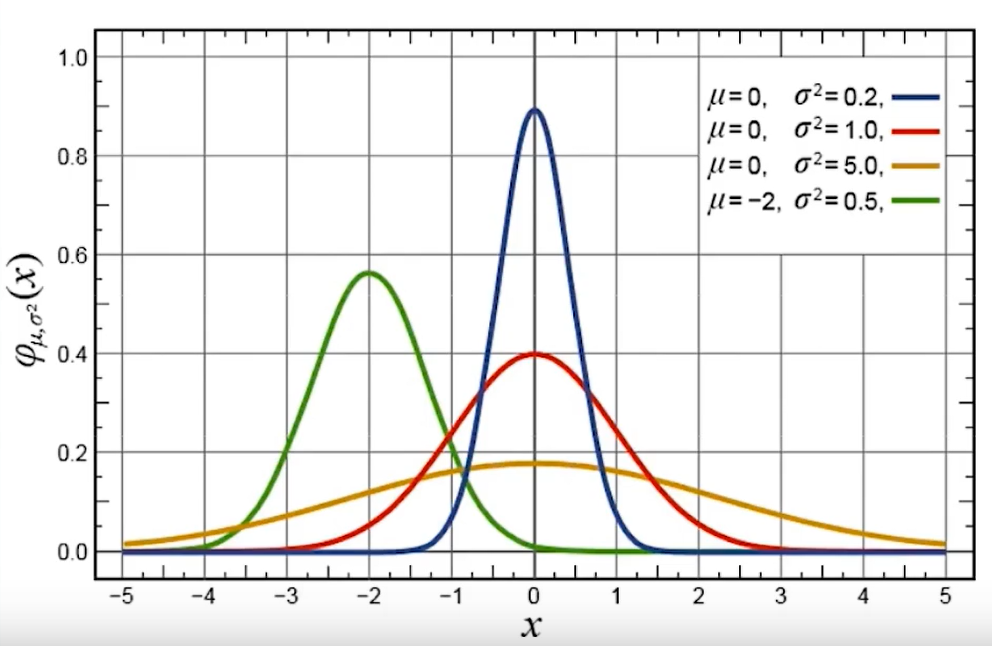

&nbsp;&nbsp;<font size=3>-高斯函数的特点是以x轴某一点(这一点成为均值)为对称轴，越靠近中心数据的概率越高，最终形成一个两边平缓，中间陡峭的钟型(也叫帽型)图形<br>&nbsp;&nbsp;-高斯滤波就是使用符合高斯分布的卷积核对图片进行卷积操作，所以高斯滤波的重点就是如何计算符合高斯分布的卷积核，即高斯模板</font>

<font size = 6>$G(x,y) = \frac{1}{2 \pi \sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$</font>

### cv2.GaussianBlur（ SRC，ksize，sigmaX [，DST [，sigmaY [，borderType ] ] ] ）

<font size=3>sigma越大，图片越模糊，平滑效果越明显;越小，图片越清晰<br>没有指定sigma时，ksize越大，平滑效果越明显<br>src –输入图像；图像可以具有任何数量的信道，其独立地处理的，但深度应CV_8U，CV_16U，CV_16S，CV_32F或CV_64F。<br>
dst –输出与图像大小和类型相同的图像src。<br>
ksize –高斯核大小。 ksize.width 并且 ksize.height 可以有所不同，但它们都必须是正数和奇数。或者，它们可以为零，然后从计算 sigma*。
sigmaX – X方向上的高斯核标准偏差。<br>
sigmaY – Y方向上的高斯核标准差；如果 sigmaY 为零，则将其设置为等于 sigmaX；如果两个西格玛均为零，则分别根据ksize.width 和 进行计算 ksize.height；完全控制的结果，无论这一切的语义未来可能的修改，建议指定所有的ksize，sigmaX和sigmaY。(只指定sigmaX也可以)<br>
borderType –像素外推方法。</font>

### 实操

In [32]:
import cv2
import numpy as np
img = cv2.imread('./chenzhuo_4.jpg')
img = cv2.resize(img,(375,500))
img_1 = cv2.GaussianBlur(img,(5,5),sigmaX=999)    #这里必须是个Tuple
cv2.imshow("GaussianBlue",img_1)
cv2.waitKey()
cv2.destroyAllWindows()

## 中值滤波

### 椒盐噪声使用中值滤波

In [35]:
img_2 = cv2.imread('./pepper_opencv.png')
img_3 = cv2.medianBlur(img_2,5)             
cv2.imshow('pepper',np.hstack((img_2,img_3)))
cv2.waitKey()
cv2.destroyAllWindows()

## 双边滤波

In [ ]:
import cv2